In [8]:
import sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

filename1 = sys.argv[1]

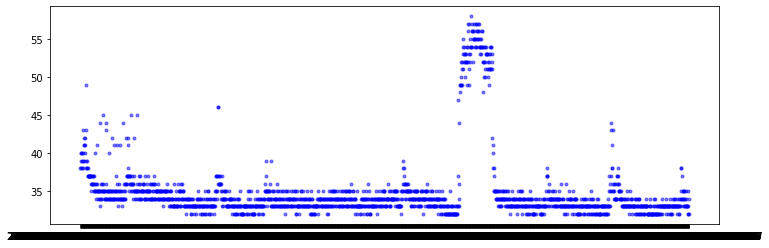

In [3]:
cpu_data = pd.read_csv("sysinfo.csv")
plt.figure(figsize=(12, 4))
plt.plot(cpu_data['timestamp'], cpu_data['temperature'], 'b.', alpha=0.5)
# plt.show() # maybe easier for testing
# plt.savefig('cpu.svg') # for final submission

In [10]:
from statsmodels.nonparametric.smoothers_lowess import lowess

In [31]:
cpu_data['timestamp1'] = pd.to_datetime(cpu_data['timestamp'], format='%Y-%m-%d %H:%M:%S')
timestamp = cpu_data['timestamp1'].apply(np.datetime64)
temperature = cpu_data['temperature'].astype(float)
loess_smoothed = lowess(temperature,timestamp, frac=0.05)

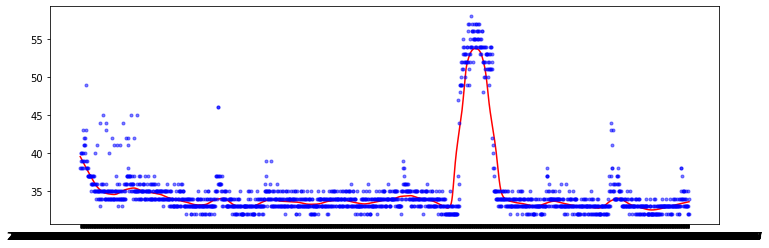

In [32]:
plt.figure(figsize=(12, 4))
plt.plot(cpu_data['timestamp'], loess_smoothed[:, 1], 'r-')
plt.plot(cpu_data['timestamp'], cpu_data['temperature'], 'b.', alpha=0.5)

In [34]:
from pykalman import KalmanFilter

In [35]:
kalman_data = cpu_data[['temperature', 'cpu_percent', 'sys_load_1']]

In [46]:
initial_state = kalman_data.iloc[0]
observation_covariance = np.diag([0.8, 0.8, 0.8]) ** 2 # TODO: shouldn't be zero
transition_covariance = np.diag([0.05, 0.05, 0.05]) ** 2 # TODO: shouldn't be zero
transition = [[1, -1, 0.7], [0, 0.6, 0.03], [0, 1.3, 0.8]] # TODO: shouldn't (all) be zero

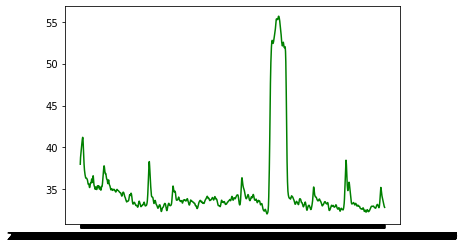

In [47]:
kf = KalmanFilter(initial_state_mean = initial_state, observation_covariance = observation_covariance, transition_covariance = transition_covariance, transition_matrices = transition)
kalman_smoothed, _ = kf.smooth(kalman_data)
plt.plot(cpu_data['timestamp'], kalman_smoothed[:, 0], 'g-')